In [153]:
# Pandas
import pandas as pd

# import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# SQL Alchemy
from sqlalchemy import create_engine

# Import password
from my_password_keys import password_key

In [154]:
# Create Engine and conenct to Employee Database 

url_firstpart = 'postgresql://postgres:'
url_secondpart = '@localhost:5432/Employee'

query_url = url_firstpart + password_key + url_secondpart

engine = create_engine(query_url)
conn = engine.connect()


In [155]:
# Query All Records in salaries and titles table from the Employee Database
salary_data = pd.read_sql("SELECT emp_no, salary FROM salaries", conn)
title_data = pd.read_sql("SELECT emp_no, title FROM titles", conn)

In [156]:
# Merge two dataframes using an inner join
df = pd.merge(title_data, salary_data, on="emp_no")

# only interested in title and salary columns
df = df[['title', 'salary']]
df = df.rename(columns = {"title" : "Job Title", "salary":"Average Salary"})

#group by title and get average of each title
df = df.groupby(["Job Title"]).agg('mean')
df = df.sort_values(by = "Average Salary", ascending = True)
df['Average Salary'] = df['Average Salary'].map("{:.0f}".format)
df = df.reset_index()

df

,Job Title,Average Salary
0,Assistant Engineer,48493
1,Senior Engineer,48507
2,Engineer,48540
3,Technique Leader,48581
4,Manager,51531
5,Staff,58465
6,Senior Staff,58503


<IPython.core.display.Javascript object>


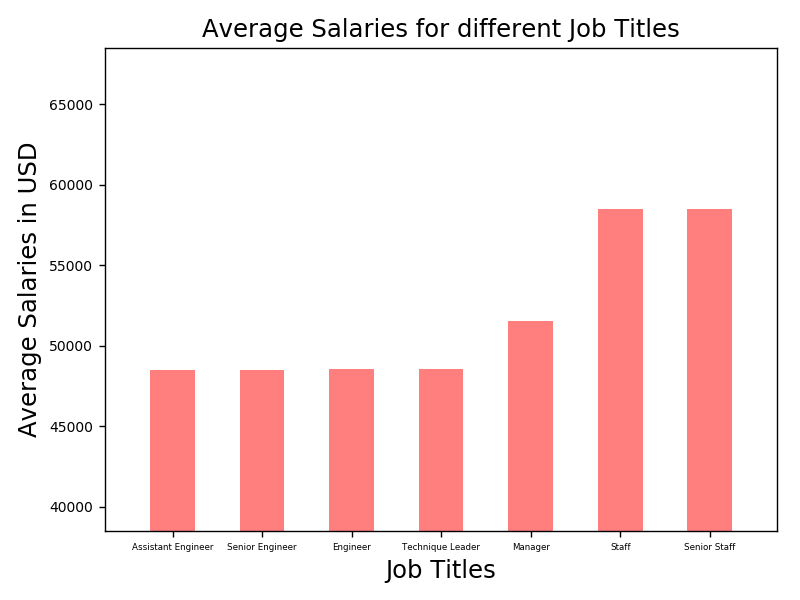

In [157]:
plt.bar(df['Job Title'], df['Average Salary'].apply(pd.to_numeric), 0.5, color='r', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in df['Job Title']]
plt.xticks(tick_locations, df['Job Title'], size=5)
plt.yticks(size=8)

# Sets the x limits of the current chart
plt.xlim(-0.75, len(df['Job Title'])-0.25)

# Sets the y limits of the current chart
plt.ylim(int(min(df['Average Salary'])) - 10000, int(max(df['Average Salary'])) + 10000)

# Give our chart some labels and a tile
plt.title("Average Salaries for different Job Titles", size = 14)
plt.xlabel("Job Titles", size = 14)
plt.ylabel("Average Salaries in USD", size = 14)

plt.tight_layout()
plt.savefig("employee-barchart.png")
plt.show()